In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf


2024-01-03 04:17:29.438191: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 04:17:29.487665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 04:17:29.487741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 04:17:29.489411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 04:17:29.497346: I tensorflow/core/platform/cpu_feature_guar

In [3]:
a = tf.constant(5)
print(a)

tf.Tensor(5, shape=(), dtype=int32)


2024-01-03 04:17:31.526911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 04:17:31.562600: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 04:17:31.562847: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
b = tf.constant(10)
c = tf.add(a,b)
print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [5]:
var1 =tf.Variable(20)
print(var1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=20>


In [6]:
var2 = tf.Variable([[1,2],[2,3]])
var3 = tf.Variable([[5,6],[7,8]])
print(tf.matmul(var2, var3))

tf.Tensor(
[[19 22]
 [31 36]], shape=(2, 2), dtype=int32)


Load and Process the Data

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
type(x_train), x_train.shape, y_train.shape, x_test.shape

(numpy.ndarray, (60000, 28, 28), (60000,), (10000, 28, 28))

0

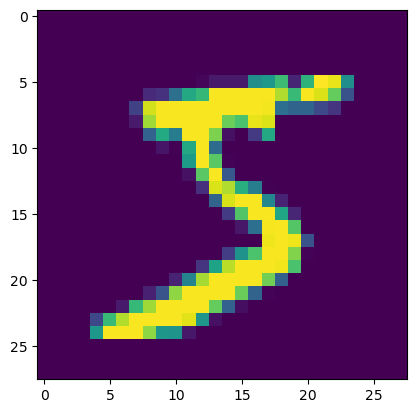

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:])
y_train[1]

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0

One Hot Encoding

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#### Model Architecture
input layer : 784\
hidden layer 1 : 256\
hidden layer 2 : 256\
output layer : 10

Sequential API

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs = 10, batch_size=32)

Epoch 1/10


2024-01-03 04:17:33.980694: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-03 04:17:34.074793: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2ce7c8a220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-03 04:17:34.074813: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-01-03 04:17:34.084970: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-03 04:17:34.111849: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1704235654.181253    6147 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2033 - accuracy: 0.9381
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accurac

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.9770


[0.10953117907047272, 0.9769999980926514]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Functional API

In [19]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [20]:
input = Input(shape=[784,])
hidden_1 = Dense(256, activation = 'relu')(input)
hidden_2 = Dense(256, activation = 'relu')(hidden_1)
hidden_3 = Dense(256, activation = 'relu')(input)
concat = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation = 'softmax')(concat)
model = Model(inputs = [input], outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 256)                  200960    ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 256)                  65792     ['dense_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 256)                  200960    ['input_1[0][0]']             
                                                                                              

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1905 - accuracy: 0.9425
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9834


[0.08286165446043015, 0.9833999872207642]

Creating Custom Layers

input = 784\
hidden_layer1 = 256, weights = 784x256 + 256\
hidden_layer2 = 256, weights = 256x256 + 256\
output_layer = 10, weights = 256x10 +10\

In [1]:
from tensorflow.keras import layers

2024-01-03 04:24:10.660832: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 04:24:10.689317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 04:24:10.689344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 04:24:10.689980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 04:24:10.694913: I tensorflow/core/platform/cpu_feature_guar

In [2]:
class mylayer (layers.Layer):
    def _init__(self, units, input_dim, activation):
        print("hello")
        super(mylayer, self)._init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape = (input_dim, units), dtype = 'float32'), trainable = True)
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value=b_init(shape = (units,), dtype = 'float32'), trainable = True)
        self.activation = activation
    
    def call(self, inputs):
        linear_op = tf.add(tf.matmul(inputs, self.w), self.b)
        if self.activation == 'relu':
            return tf.nn.relu(linear_op)
        elif self.activation == 'softmax':
            return tf.nn.softmax(linear_op)

Creating Custom MOdel

In [4]:
import tensorflow as tf
class mymodel(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes):
        super(mymodel, self).__init__()
        self.layer1 = mylayer(n_hidden1, n_input, 'relu')
        self.layer2 = mylayer(n_hidden2, n_hidden1, 'relu')
        self.out_layer = mylayer(n_classes, n_hidden2, 'softmax')
    
    def call(self, inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.out_layer(x)

In [7]:
w_init = tf.random_normal_initializer()
w = tf.Variable(initial_value=w_init(shape = (256, 784), dtype = 'float32'), trainable = True)
w

<tf.Variable 'Variable:0' shape=(256, 784) dtype=float32, numpy=
array([[-0.04847223, -0.01916942, -0.04715405, ..., -0.04631084,
         0.03656955,  0.01261461],
       [ 0.01189059,  0.02480782, -0.08466458, ...,  0.01510669,
        -0.03683078, -0.02111223],
       [-0.0082274 ,  0.01443463,  0.02988019, ...,  0.05887831,
         0.05707807, -0.00807729],
       ...,
       [ 0.02866347, -0.01204268, -0.04520221, ...,  0.05460503,
        -0.01339249, -0.04668523],
       [-0.02152305, -0.00482944, -0.02437777, ...,  0.00889612,
         0.12839858,  0.05654356],
       [-0.02555323, -0.05497617,  0.07755703, ...,  0.11145898,
        -0.02365244, -0.02726433]], dtype=float32)>

In [5]:
model = mymodel(784, 256, 256, 10)

2024-01-03 04:24:41.220129: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 04:24:41.244787: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 04:24:41.244936: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

TypeError: Expected `trainable` argument to be a boolean, but got: 256

In [8]:
model.compile(optimizer = 'adam', loss ='categorical_croosentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size =512)

In [ ]:
model.evaluate(x_test, y_test)